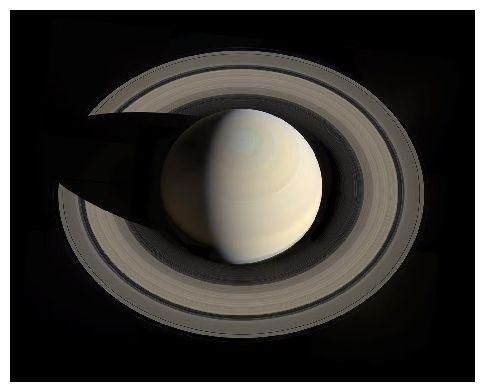

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


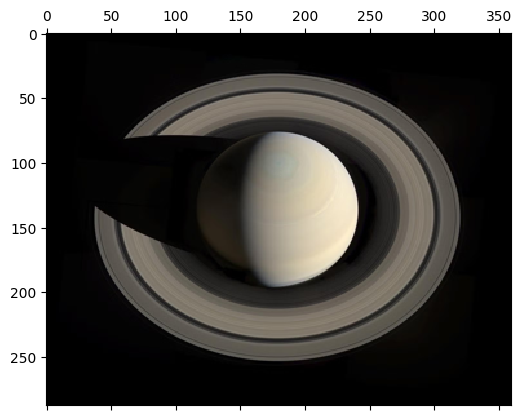

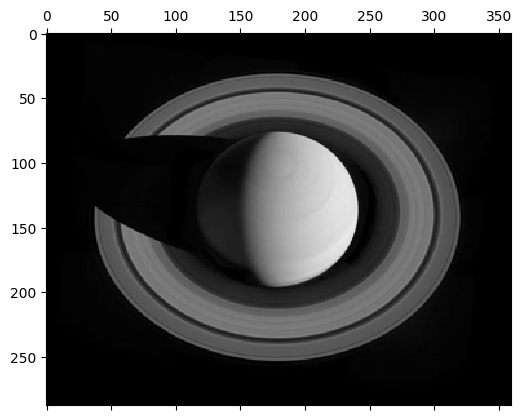

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt 
import numpy as np

img = Image.open("saturn.png").convert("RGB")  # or .png, .jpeg, etc.

plt.matshow(img)
plt.axis(False)
plt.show()  # display image

r = 0.25
width, height = img.size
new_size = (int(width * r), int(height * r))
img = img.resize(new_size)
print(np.array(img))
plt.matshow(img)
plt.axis()
plt.show()  

gray = np.round(np.mean(img, axis=2)).astype(np.uint8)
plt.matshow(gray, cmap='gray', vmin=0, vmax=255)
plt.axis()
plt.show()  

print(gray)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[['00000000' '00000000' '00000000' ... '00000000' '00000000' '00000000']
 ['00000000' '00000000' '00000000' ... '00000000' '00000000' '00000000']
 ['00000000' '00000000' '00000000' ... '00000000' '00000000' '00000000']
 ...
 ['00000000' '00000000' '00000000' ... '00000000' '00000000' '00000000']
 ['00000000' '00000000' '00000000' ... '00000000' '00000000' '00000000']
 ['00000000' '00000000' '00000000' ... '00000000' '00000000' '00000000']] (288, 360)
360 288
0000000101101000 0000000100100000
['00000000' '00000000' '00000000' ... '00000000' '00000000' '00000000']
12960
['0000000101101000', '0000000100100000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', 

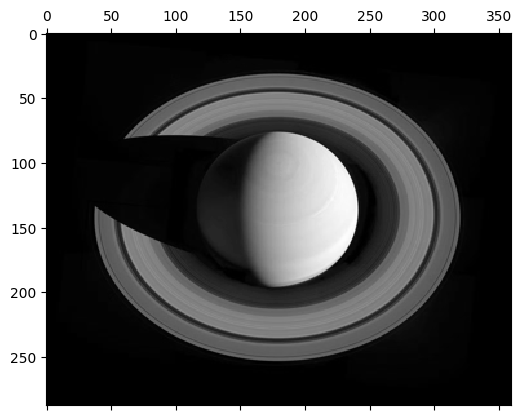

In [ ]:
print(gray)
plt.matshow(gray,cmap = "gray")
bin_data = np.vectorize(lambda x: np.binary_repr(x, width=8))(gray)
print(bin_data, bin_data.shape)

height,width = gray.shape
print(width,height)
w_bin = np.binary_repr(width, width=16)
h_bin = np.binary_repr(height, width=16)
print(w_bin, h_bin)

bin_data = bin_data.flatten()
byes = len(bin_data)//8
print(bin_data)
print(byes)

full_data = [w_bin , h_bin] + bin_data.tolist()
print(full_data)

transmit_data = "".join(full_data)
print(transmit_data)

print(len(transmit_data)//8 - 4)

In [ ]:
def hamming_code_transmit(message):
    def hamming_encode(chunk):
        c = [int(i) for i in list(chunk)]
        output =   [0   ,   0,   0,c[0],
                    0   ,c[1],c[2],c[3],
                    0   ,c[4],c[5],c[6],
                    c[7],c[8],c[9],c[10]]
        for j in range(4):
            output[2**j] = sum([output[i] for i in range(16) if (i >> j) & 1])%2
        output[0] = sum(output)%2
        return ''.join(str(i) for i in output)
    remainder = len(message) % 11
    if remainder != 0:
        message += '0' * (11 - remainder)
    chunks = [message [i:i+11] for i in range(0, len(message), 11)]
    output = ""
    for chunk in chunks:
        output += hamming_encode(chunk)
    return output
    
def hamming_code_recieve(message):
    def chunk_decode(c):
        out = ""
        for i in range(16):
            if i & (i - 1) != 0:
                out += str(c[i])
        return(out) 
    
    def hamming_decode(chunk):
        c = [int(i) for i in list(chunk)]
        if sum(c)%2 == 0:
            return chunk_decode(c)
        else:
            error_index = 0
            error_bit = []
            for j in range(4):
                error_bit.append(sum([c[i] for i in range(16) if (i >> j) & 1])%2)
            for i,p in enumerate(error_bit):
                error_index += 2**i * p
            # # print(error_index)
            c[error_index] ^= 1
            return chunk_decode(c)

    chunks = [message [i:i+16] for i in range(0, len(message), 16)]
    output = ""
    for chunk in chunks:
        output += hamming_decode(chunk)
    n = len(output)%8
    output = output[:len(output) - n]
    return output

transmit_data = hamming_code_transmit(transmit_data)

1001010000100000010000000001010110000000001010100000000000000000000100010110100110010010010100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [ ]:
import random

def noisy_channel(data, flip_rate=0.01):
    # Convert string to list of integers
    data = [int(x) for x in data]

    # Flip each bit with probability = flip_rate
    noisy_data = []
    for bit in data:
        if random.random() < flip_rate:
            noisy_data.append(1 - bit)  # flip 0→1 or 1→0
        else:
            noisy_data.append(bit)
    # Convert back to string
    return ''.join(map(str, noisy_data))




In [ ]:
recieved_data = noisy_channel(transmit_data,0.1)

def reconstruct_image(bit_string):
    # 1. Extract width and height (first 32 bits)
    w_bin = bit_string[:16]
    print(w_bin)
    h_bin = bit_string[16:32]
    print(h_bin)

    # 2. Convert to integers
    width = 360#int(w_bin, 2)
    height = 288#int(h_bin, 2)

    print(f"Width: {width}, Height: {height}")
    
    # 3. Extract the image data
    pixel_bits = bit_string[32:]

    print(f"Expected pixels: {width * height}")
    print(f"Actual pixels: {len(pixel_bits) // 8}")
    # 4. Convert to pixel values (assume 8 bits per pixel)
    pixels = [int(pixel_bits[i:i+8], 2) for i in range(0, len(pixel_bits), 8)]

    # 5. Convert to NumPy array and reshape
    img_array = np.array(pixels, dtype=np.uint8).reshape((height, width))

    # 6. Convert to image and return
    return img_array

recieved_data = hamming_code_recieve(recieved_data)
# reconstruct image
img = reconstruct_image(recieved_data)
print(img)
plt.figure(figsize=(10, 10), dpi =300)
plt.matshow(img, cmap='gray', vmin=0, vmax=255)

0011010110100010
1000000010100000
Width: 360, Height: 288
Expected pixels: 103680
Actual pixels: 59823


ValueError: cannot reshape array of size 59824 into shape (288,360)